In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [3]:
# loading the dataset
df = pd.read_csv('../dataset/heart.csv')

In [4]:
# first 5 rows
df.head()

# age - age in years
# sex - (1 = male, 0 = female)
# cp - chest pain type (0 = No pain, 3 = Severe)
# trestbps - resting blood pressure (in mm Hg)
# chol - serum cholestoral in mg/dl
# fbs - fasting blood sugar (1 = greator that 120 mg/dl; 0 = lesser that 120 mg/dl)
# restecg - resting electrocardiographic results (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)
# thalach - maximum heart rate achieved
# exang - exercise induced angina (1 = yes; 0 = no)
# oldpeak - ST depression induced by exercise relative to rest
# slope - the slope of the peak exercise ST segment (0=upsloping, 1=flat, 2=downsloping)
# ca - number of major vessels (0-3) colored by flourosopy
# thal - (1 = normal; 2 = fixed defect; 3 = reversable defect)
# target - (1=disease,  0=no disease)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# describing the structure of the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
cat = ['sex', 'cp', 'fbs', 'slope', 'ca', 'thal']
for i in cat:
    print(i)
    print(df[i].value_counts())

sex
1    713
0    312
Name: sex, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: cp, dtype: int64
fbs
0    872
1    153
Name: fbs, dtype: int64
slope
1    482
2    469
0     74
Name: slope, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: thal, dtype: int64


In [7]:
# splitting the data into test and train sets
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=10)

In [8]:
# trying the Random Forest Classifier Model
model_rf = RandomForestClassifier(max_depth=5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [9]:
# Accuracy achieved = 91%
model_rf.score(X_test, y_test)

0.9545454545454546

In [10]:
# trying the Logistic Regression Model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_test, y_test)

LogisticRegression(max_iter=1000)

In [11]:
# Accuracy achieved = 93%
model_lr.score(X_test, y_test)

0.9155844155844156

In [12]:
predictions = model_lr.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

Text(33.0, 0.5, 'Truth')

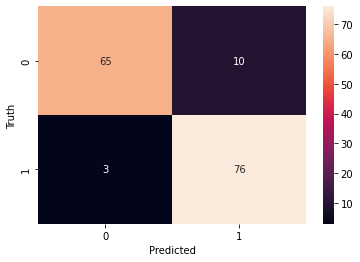

In [14]:
# printing the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91        75
           1       0.88      0.96      0.92        79

    accuracy                           0.92       154
   macro avg       0.92      0.91      0.92       154
weighted avg       0.92      0.92      0.92       154



In [16]:
# saving the trained model for later use
pickle.dump(model_lr,open('../Saved Models/heart_disease.pickle','wb'))